[View in Colaboratory](https://colab.research.google.com/github/x110/KaggleComp/blob/master/imaterialist_challenge_furniture_2018.ipynb)

# A Model for Automatic Product Recognition


##Introduction 

The objective of this notebook is to provide a solution for the Imaterialist Challenge (Furniture) 2018 Kaggle competition. The competotion goal is to develop an algorithm for **automatic product recognition **– to accurately assign category labels for furniture and home goods images." More information about the challenge can be found here: https://www.kaggle.com/c/imaterialist-challenge-furniture-2018

My approach is to use "over the counter" models for the image recognition task. 

Thanks for Google colab for providing access to free GPUs!! I will start bypreparing the infrastructure to develop our deep learning models. We need to install the dependencies on the GPU instance of google colab and also host and access the dataset from a private google drive.


## Prepare virtual machine on google colab

1. Connect to google drive
2. Install dependencies

In [1]:
!ls

datalab


In [2]:
!pip install https://github.com/fastai/fastai/archive/master.zip
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

    100% |████████████████████████████████| 90.0MB 494kB/s 
    100% |████████████████████████████████| 1.5MB 15.4MB/s 
    100% |████████████████████████████████| 112kB 20.7MB/s 
    100% |████████████████████████████████| 174kB 23.6MB/s 
    100% |████████████████████████████████| 3.4MB 12.2MB/s 


    96% |██████████████████████████████▉ | 478.1MB 16.8MB/s eta 0:00:02

    100% |████████████████████████████████| 496.4MB 31kB/s 
    100% |████████████████████████████████| 51kB 11.5MB/s 
    100% |████████████████████████████████| 61kB 14.1MB/s 
    100% |████████████████████████████████| 51kB 12.0MB/s 
    100% |████████████████████████████████| 2.2MB 12.5MB/s 
    100% |████████████████████████████████| 13.7MB 3.1MB/s 
    100% |████████████████████████████████| 92kB 17.4MB/s 
    100% |████████████████████████████████| 112kB 24.7MB/s 
    100% |████████████████████████████████| 71kB 22.9MB/s 
    100% |████████████████████████████████| 81kB 17.5MB/s 


  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-5qfkfgrv/wheels/64/3d/9f/d12a217aa2531321c5b9ae96288fcae2687d3b744376e8f94f
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ done

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
    36% |███████████▋                    | 214.6MB 31.2MB/s eta 0:00:13

    100% |████████████████████████████████| 592.3MB 17.2MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1
    100% |████████████████████████████████| 2.0MB 15.1MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [3]:
## Connect to google drive for storage 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive
!apt-get install p7zip-full

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-4).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [4]:
!ls

datalab  drive


In [5]:
## More dependencies
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/61/d6/e6/38fc0e2316f49b91aafdaf9a8d7756a9906b2ad7e501c1e165
Successfully built kaggle
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
!mkdir .kaggle

In [0]:
!cp drive/kaggle.json /content/.kaggle/

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [9]:
#install More dependencies
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!apt-get install p7zip-full

    100% |████████████████████████████████| 5.6MB 6.5MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.1MB 4.5MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-4).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


## Download Kaggle Dataset


In [0]:
!mkdir data
!mkdir data/train

In [0]:
!unzip -qq drive/test.zip -d data
!unzip -qq drive/valid.zip -d data

In [12]:
!ls

data  datalab  drive


In [0]:
!mkdir train0
!unzip -qq drive/train_chunk0.zip -d train0
!mkdir train1
!unzip -qq drive/train_chunk1.zip -d train1
!mkdir train2
!unzip -qq drive/train_chunk2.zip -d train2
!mkdir train3
!unzip -qq drive/train_chunk3.zip -d train3
!mkdir train4
!unzip -qq drive/train_chunk4.zip -d train4
!mkdir train5
!unzip -qq drive/train_chunk5.zip -d train5


In [14]:
!ls

data  datalab  drive  train0  train1  train2  train3  train4  train5


In [0]:
import pathlib
for i in range(1,129):
  p = pathlib.Path(f'data/train/{i}').mkdir(exist_ok=True)

In [0]:
for j in range(0,5):
  for i in range(1,129):
    cmd = f'train{j}/{i}/* data/train/{i}/'
    !mv {cmd}

In [17]:
!kaggle competitions download -c imaterialist-challenge-furniture-2018


 70%|██████████████████████████▍           | 5.00M/7.19M [00:00<00:00, 17.4MB/s]
100%|██████████████████████████████████████| 7.19M/7.19M [00:00<00:00, 24.5MB/s]
  0%|                                                | 0.00/268k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 268k/268k [00:00<00:00, 80.8MB/s]
  0%|                                                | 0.00/480k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 480k/480k [00:00<00:00, 92.4MB/s]
  0%|                                                | 0.00/116k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 116k/116k [00:00<00:00, 58.0MB/s]


In [18]:
!ls data/

__MACOSX  test	train  valid


In [0]:
!cp .kaggle/competitions/imaterialist-challenge-furniture-2018/train.json.zip data/

In [0]:
!unzip -qq .kaggle/competitions/imaterialist-challenge-furniture-2018/train.json.zip -d .kaggle/competitions/imaterialist-challenge-furniture-2018

In [0]:
!unzip -qq data/train.json.zip -d data


In [0]:
#uncomment to refresh google drive
#!google-drive-ocamlfuse -cc
#!ls drive

# Imports


In [0]:
# Imports
%matplotlib inline
#%reload_ext autoreload
#%autoreload 2

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from pathlib import Path
import json
import pathlib

# Explore Data

First, lets have a look at the data

In [24]:
PATH = pathlib.Path(".kaggle/competitions/imaterialist-challenge-furniture-2018")
list(PATH.iterdir())

[PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/train.json.zip'),
 PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/train.json'),
 PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/test.json.zip'),
 PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/sample_submission_randomlabel.csv'),
 PosixPath('.kaggle/competitions/imaterialist-challenge-furniture-2018/validation.json.zip')]

In [0]:
trn_j = json.load((PATH/'train.json').open())

In [26]:
trn_j.keys()

dict_keys(['images', 'annotations'])

In [27]:
len(trn_j['images'])

194828

The number of the training examples are 194828. Lets look at the first sample:

In [28]:
trn_j['images'][0]

{'image_id': 1,
 'url': ['https://img13.360buyimg.com/imgzone/jfs/t2857/351/510705008/279959/4e27dce0/57171f60N523c940e.jpg']}

In [29]:
trn_j['annotations'][0]

{'image_id': 1, 'label_id': 5}

# Model

In [0]:
#split data into train and validation
PATH = pathlib.Path("/content/data")
#valid_idxs = get_cv_idxs(len(df3))

In [0]:
def get_data(sz,bs,arch):
    tfms = tfms_from_model(arch, sz,aug_tfms=transforms_side_on,max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH,tfms=tfms,bs=bs,test_name='test')
    return data
  

In [0]:
sz=50
arch = resnet34
bs=512
data = get_data(sz,bs,arch)


In [0]:
learn = ConvLearner.pretrained(arch,data,precompute=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 51788601.02it/s]


100%|██████████| 25/25 [02:03<00:00,  4.95s/it]


 97%|█████████▋| 265/274 [01:05<00:02,  4.07it/s, loss=16.3]

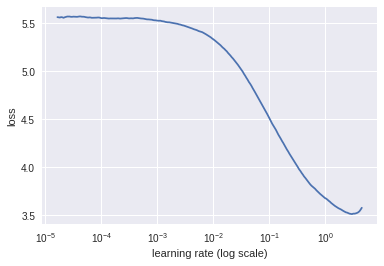

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=.05

In [0]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      2.749241   2.540362   0.365193  
    1      2.51695    2.397484   0.394674  
 23%|██▎       | 64/274 [00:09<00:30,  6.92it/s, loss=2.47]

    2      2.438684   2.337472   0.406087  


[array([2.33747]), 0.40608654338804473]

In [0]:
learn.save("/content/drive/resnet_50")
learn.load("/content/drive/resnet_50")

In [0]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      2.380525   2.271934   0.417499  
    1      2.321193   2.245263   0.423522  
 24%|██▎       | 65/274 [00:09<00:30,  6.93it/s, loss=2.29]

    2      2.306488   2.221125   0.433508  


[array([2.22112]), 0.43350768735507417]

In [0]:
learn.save("/content/drive/resnet_50")
learn.load("/content/drive/resnet_50")

In [0]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      2.227139   2.210113   0.438104  
    1      2.239524   2.183388   0.441908  
 24%|██▍       | 66/274 [00:09<00:29,  7.09it/s, loss=2.19]

    2      2.190922   2.163794   0.44809   


[array([2.16379]), 0.4480900303424491]

In [0]:
learn.save("/content/drive/resnet_50")
learn.load("/content/drive/resnet_50")

In [0]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      2.195608   2.158666   0.446029  
    1      2.200153   2.163464   0.444286  
 23%|██▎       | 64/274 [00:08<00:29,  7.24it/s, loss=2.17]

    2      2.149952   2.151554   0.450943  


[array([2.15155]), 0.45094309693604195]

 97%|█████████▋| 265/274 [00:34<00:01,  7.69it/s, loss=16.3]

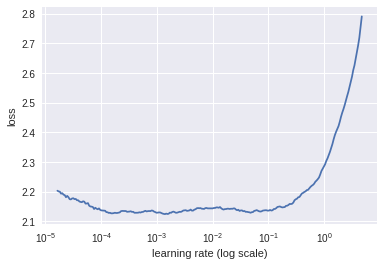

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .01

In [0]:
learn.precompute = False

In [0]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      2.186376   2.126775   0.455698  
 82%|████████▏ | 225/274 [19:06<04:09,  5.09s/it, loss=2.16]

    1      2.167535   2.125244   0.45126   
    2      2.15868    2.122263   0.456174  


[array([2.12226]), 0.45617372080988394]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [0]:
learn.load("/content/drive/resnet_50_1")

NameError: ignored

 97%|█████████▋| 267/274 [22:35<00:35,  5.08s/it, loss=25.3]


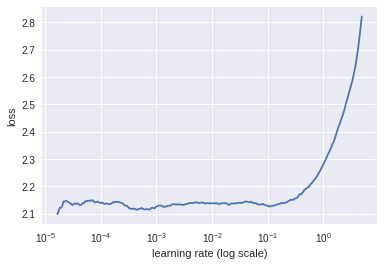

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
learn.unfreeze()

In [0]:
lr = .001
lrs = [lr/100,lr/10,lr]

In [0]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      2.288883   2.218962   0.429545  
 82%|████████▏ | 226/274 [20:05<04:15,  5.33s/it, loss=1.98]

    1      1.948729   1.939973   0.482961  
    2      1.830315   1.908176   0.492154  



[array([1.90818]), 0.49215406559219943]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [0]:
learn.load("/content/drive/resnet_50_1")

NameError: ignored

In [0]:
sz=100
data = get_data(sz,bs,arch)
learn.set_data(data)

 97%|█████████▋| 267/274 [24:45<00:38,  5.56s/it, loss=30.1]

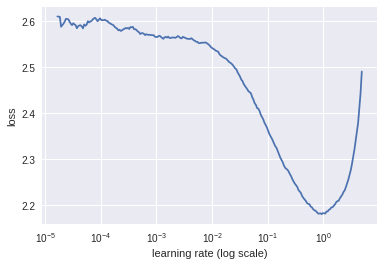

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .1

In [0]:
learn.freeze()

In [0]:
learn.precompute = False

In [0]:
learn.fit(lr,1)

epoch      trn_loss   val_loss   accuracy   
    0      1.795487   1.692475   0.532414  


[array([1.69247]), 0.5324140112946879]

In [0]:
learn.precompute = False

In [0]:
learn.save("/content/drive/resnet_50_1")

In [0]:
learn.load("/content/drive/resnet_50_1")

In [0]:
learn.unfreeze()

In [0]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.104393   1.09054    0.6822    
 82%|████████▏ | 226/274 [22:06<04:41,  5.87s/it, loss=1.07]

    1      1.00692    1.151322   0.661912  
    2      0.651986   0.89334    0.738786  


[array([0.89334]), 0.7387858611748702]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [0]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.695859   0.903675   0.737518  
 81%|████████  | 222/274 [21:43<05:05,  5.87s/it, loss=0.806]

    1      0.762961   1.0197     0.714693  
    2      0.441895   0.856427   0.757806  


[array([0.85643]), 0.7578063090623398]

In [0]:
learn.save("/content/drive/resnet_50_1")

In [0]:
sz=100
arch = resnet34
bs=512
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 49510332.00it/s]


In [0]:
learn.load("/content/drive/resnet_50_1")

In [0]:
sz=300
arch = resnet34
bs = 128
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)
learn.set_data(data)
data = data.resize(int(sz*1.3),'tmp')

In [0]:
learn.freeze()

In [0]:
learn.precompute = False

 87%|████████▋ | 951/1094 [48:11<07:14,  3.04s/it, loss=6.29]

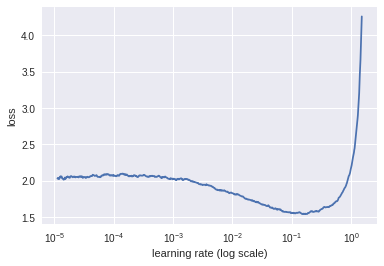

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .05

In [0]:
learn.precompute = False
learn.freeze()

In [0]:
learn.fit(lr,5)

epoch      trn_loss   val_loss   accuracy   
    0      1.317396   1.193919   0.650658  
 30%|███       | 333/1094 [16:54<38:38,  3.05s/it, loss=1.26]

    1      1.217988   1.133951   0.667459  
  3%|▎         | 32/1094 [01:52<1:02:26,  3.53s/it, loss=1.19]

    2      1.207281   1.090453   0.680139  
  0%|          | 0/1094 [00:18<?, ?it/s, loss=1.21]

    3      1.143942   1.068837   0.684419  
  0%|          | 0/1094 [00:19<?, ?it/s, loss=1.15]

    4      1.147638   1.047643   0.689016  



[array([1.04764]), 0.6890156919254443]

In [0]:
learn.save("/content/drive/resnet_50_300")

In [0]:
learn.fit(lr,5)

epoch      trn_loss   val_loss   accuracy   
    0      1.120206   1.029402   0.695356  
 30%|███       | 333/1094 [16:53<38:36,  3.04s/it, loss=1.1] 

    1      1.092599   1.021789   0.700111  
  3%|▎         | 33/1094 [01:53<1:00:44,  3.43s/it, loss=1.07]

    2      1.098397   1.011539   0.70233   
  0%|          | 0/1094 [00:15<?, ?it/s, loss=1.1]

    3      1.082416   1.013686   0.700586  
  0%|          | 0/1094 [00:16<?, ?it/s, loss=1.08]

    4      1.068734   0.992273   0.707561  



[array([0.99227]), 0.7075606275424845]

In [0]:
learn.save("/content/drive/resnet_50_300")

In [0]:
learn.load("/content/drive/resnet_50_300")

In [0]:
learn.unfreeze()

 84%|████████▍ | 923/1094 [1:08:10<12:37,  4.43s/it, loss=3.77]

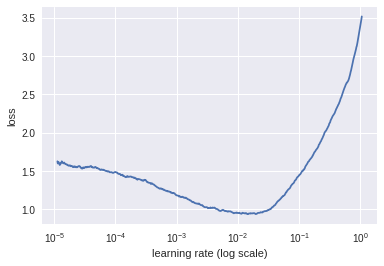

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=.001

In [0]:
lrs = [lr/100,lr/10,lr]

In [0]:
learn.fit(lrs,3)

epoch      trn_loss   val_loss   accuracy   
    0      1.079245   1.025482   0.695831  
 30%|███       | 329/1094 [24:50<57:45,  4.53s/it, loss=1.05]

    1      0.967097   0.956411   0.711523  
  2%|▏         | 20/1094 [01:40<1:30:18,  5.05s/it, loss=0.98]

    2      0.91139    0.916432   0.726581  



[array([0.91643]), 0.7265810744946459]

In [0]:
learn.save("/content/drive/resnet_50_300_2")

In [0]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.829857   0.841986   0.747504  
 30%|██▉       | 327/1094 [24:47<58:09,  4.55s/it, loss=0.812]

    1      0.768247   0.78621    0.76589   
  1%|▏         | 16/1094 [01:28<1:39:51,  5.56s/it, loss=0.766]

    2      0.719063   0.780045   0.768426  



[array([0.78005]), 0.7684260581068388]

In [0]:
learn.save("/content/drive/resnet_50_300_2")

In [0]:
learn.load("/content/drive/resnet_50_300_2")

In [0]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.716076   0.777595   0.769536  
 30%|██▉       | 327/1094 [26:04<1:01:09,  4.78s/it, loss=0.725]

    1      0.707578   0.772534   0.770804  
  1%|▏         | 15/1094 [01:22<1:39:21,  5.52s/it, loss=0.696]

    2      0.70808    0.771465   0.769536  
  0%|          | 0/1094 [00:21<?, ?it/s, loss=0.711]

    3      0.71054    0.768413   0.770011  
  0%|          | 0/1094 [00:19<?, ?it/s, loss=0.707]

    4      0.700357   0.766043   0.772389  
  0%|          | 0/1094 [00:21<?, ?it/s, loss=0.703]

    5      0.714627   0.767692   0.76906   
  0%|          | 0/1094 [00:19<?, ?it/s, loss=0.716]

    6      0.698171   0.766489   0.768743  



[array([0.76649]), 0.7687430653014299]

In [0]:
learn.save("/content/drive/resnet_50_300_3")

In [0]:
learn.load("/content/drive/resnet_50_300_3")

## Predict based on the best model

In [0]:
sz=300
arch = resnet34
bs = 128
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)
learn.set_data(data)
learn.load("/content/drive/resnet_50_300_3")

In [0]:
log_preds = learn.predict()

In [0]:
log_preds.shape

(6309, 128)

In [0]:
probs1 = np.exp(log_preds)
probs1

array([[0.99963, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.94268, 0.     , 0.     , ..., 0.     , 0.     , 0.00416],
       [0.09253, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.99897],
       [0.     , 0.00103, 0.     , ..., 0.     , 0.     , 0.99565],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.98868]], dtype=float32)

In [0]:
p1 = np.argmax(np.exp(log_preds),axis=1)


In [0]:
y= data.val_y
y.shape

(6309,)

In [0]:
accuracy_np(probs1,y)

0.7687430654620384

## Predict based on an ensembel of two models.
This is an experiment. I have three models trained on different sizes: 50, 100, and 300. How will the prediction improve if I where to use an ensembel of those models. 
  

### load the second model

In [0]:
sz=100
arch = resnet34
bs = 128
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)
learn.set_data(data)
learn.load("/content/drive/resnet_50_1")

In [0]:
log_preds = learn.predict()
probs2 = np.exp(log_preds)
accuracy_np(probs2,y)

0.7578063084482486

In [0]:
p2 = np.argmax(np.exp(log_preds),axis=1)


In [0]:
probse = (2*probs1+probs2)/3.

In [0]:
accuracy_np(probse,y)

0.7901410683151054

## Model 2

Let us have a look at the number of classes. We have 128 different classes. For multiclass classification, convolutional neural network higher than resnet 34 can perform much better.  Let us try a bunch of them.



First, lets download the wieghts of resnext50.

In [32]:
!ls /usr/local/lib/python3.6/dist-packages/fastai

adaptive_softmax.py  initializers.py	  metrics.py	sgdr.py
column_data.py	     __init__.py	  model.py	structured.py
conv_learner.py      io.py		  models	swa.py
core.py		     layer_optimizer.py   nlp.py	text.py
dataloader.py	     layers.py		  plots.py	torch_imports.py
dataset.py	     learner.py		  __pycache__	transforms_pil.py
executors.py	     lm_rnn.py		  rnn_reg.py	transforms.py
fp16.py		     losses.py		  rnn_train.py	utils.py
imports.py	     lsuv_initializer.py  set_spawn.py


In [33]:
!wget --header="Host: files.fast.ai" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "http://files.fast.ai/models/weights.tgz" -O "weights.tgz" -c

--2018-06-26 07:57:20--  http://files.fast.ai/models/weights.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195411318 (1.1G) [text/plain]
Saving to: ‘weights.tgz’

weights.tgz         100%[===================>]   1.11G  35.9MB/s    in 33s     

2018-06-26 07:57:53 (35.1 MB/s) - ‘weights.tgz’ saved [1195411318/1195411318]



In [0]:
!mv weights.tgz /usr/local/lib/python3.6/dist-packages/fastai

In [35]:
!tar -xvzf /usr/local/lib/python3.6/dist-packages/fastai/weights.tgz

weights/
weights/wrn_50_2f.pth
weights/resnext_101_32x4d.pth
weights/resnext_101_64x4d.pth
weights/inceptionresnetv2-d579a627.pth
weights/inceptionv4-97ef9c30.pth
weights/resnext_50_32x4d.pth


In [0]:
!mv weights /usr/local/lib/python3.6/dist-packages/fastai/

In [0]:
sz=50
arch = resnext50
bs = 128
data = get_data(sz,bs,arch)
learn = ConvLearner.pretrained(arch,data,precompute=False)
data = data.resize(int(sz*1.3),'tmp')

 56%|█████▌    | 77786/140000 [14:12<11:22, 91.21it/s]

In [0]:
learn.precompute = False

 87%|████████▋ | 952/1094 [21:52<03:15,  1.38s/it, loss=13.2]

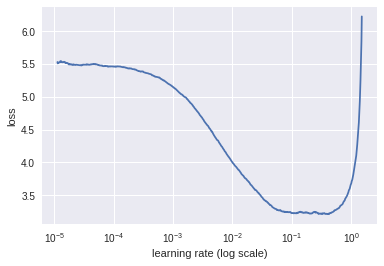

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr = .01

In [0]:
!rm -r data/tmp

In [0]:
learn.precompute=False

In [0]:
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      2.685257   2.563279   0.359169  
 30%|███       | 333/1094 [07:41<17:34,  1.39s/it, loss=2.63]

    1      2.531595   2.426385   0.386274  
  3%|▎         | 33/1094 [00:55<29:37,  1.67s/it, loss=2.51]

    2      2.475832   2.341695   0.40355   


[array([2.3417]), 0.4035504833607803]

In [0]:
learn.save("/content/drive/resnext50_50_1")

In [0]:
learn.fit(lr,2)

epoch      trn_loss   val_loss   accuracy   
    0      2.373719   2.303424   0.412744  
 30%|███       | 333/1094 [07:33<17:17,  1.36s/it, loss=2.38]

    1      2.36111    2.262351   0.42479   


[array([2.26235]), 0.4247899823945342]

In [0]:
learn.save("/content/drive/resnext50_50_2")

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

 87%|████████▋ | 957/1094 [23:20<03:20,  1.46s/it, loss=9.11]

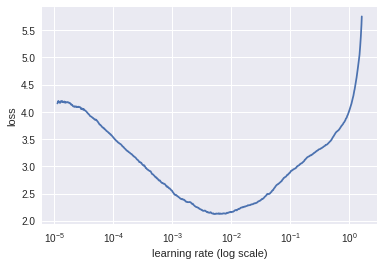

In [0]:
learn.sched.plot()

In [0]:
lr = .001
lrs = [lr/100,lr/10,lr]

In [0]:
learn.fit(lrs,2)

epoch      trn_loss   val_loss   accuracy   
    0      2.279408   2.169923   0.436995  
 30%|███       | 333/1094 [08:12<18:45,  1.48s/it, loss=2.18]

    1      1.996921   1.946298   0.485814  


[array([1.9463]), 0.4858139165892505]

In [0]:
learn.save("/content/drive/resnext50_50_3")

In [0]:
learn.fit(lrs,2)

epoch      trn_loss   val_loss   accuracy   
    0      1.834449   1.821554   0.514503  
 30%|███       | 333/1094 [08:16<18:55,  1.49s/it, loss=1.78]

    1      1.741553   1.735251   0.534792  


[array([1.73525]), 0.5347915674695728]

In [0]:
learn.load("/content/drive/resnext50_50_3")

Now we will exoand the input size to100x100

In [0]:
sz=100
data = get_data(sz,bs,arch)
learn.set_data(data)

In [0]:
learn.freeze()

 87%|████████▋ | 952/1094 [23:12<03:27,  1.46s/it, loss=8.17]

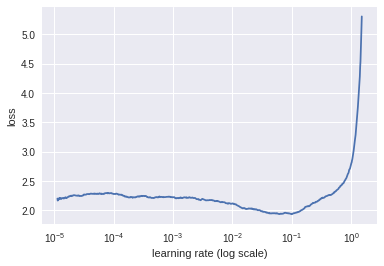

In [42]:
learn.lr_find()
learn.sched.plot()

In [44]:
lr=.01
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy   
    0      1.721101   1.678922   0.539071  
 30%|███       | 333/1094 [08:11<18:42,  1.48s/it, loss=1.68]

    1      1.622053   1.601133   0.557775  
  3%|▎         | 33/1094 [00:53<28:41,  1.62s/it, loss=1.6]

    2      1.586      1.552918   0.572832  


[array([1.55292]), 0.5728324614589236]

In [0]:
learn.unfreeze()

In [0]:
learn.save("/content/drive/resnext500_100_1")

 87%|████████▋ | 947/1094 [25:27<03:57,  1.61s/it, loss=5.25]

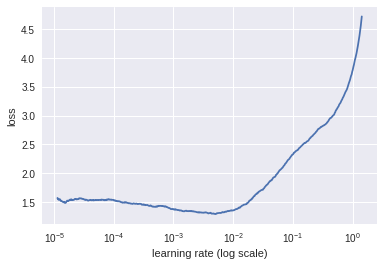

In [49]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=.001
lrs=[lr/100,lr/10,lr]

In [51]:
learn.fit(lrs,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.367597   1.353544   0.615945  
 30%|███       | 333/1094 [08:56<20:24,  1.61s/it, loss=1.29]

    1      1.240487   1.251003   0.642733  
  3%|▎         | 33/1094 [00:57<30:42,  1.74s/it, loss=1.24]

    2      1.20232    1.233524   0.648756  


[array([1.23352]), 0.6487557458167107]

In [0]:
learn.save("/content/drive/resnext50_100_1")